## Langgraph is a library for building statefull , multi- actor applications with LLMs, used to create agent and multi-agent workflows.

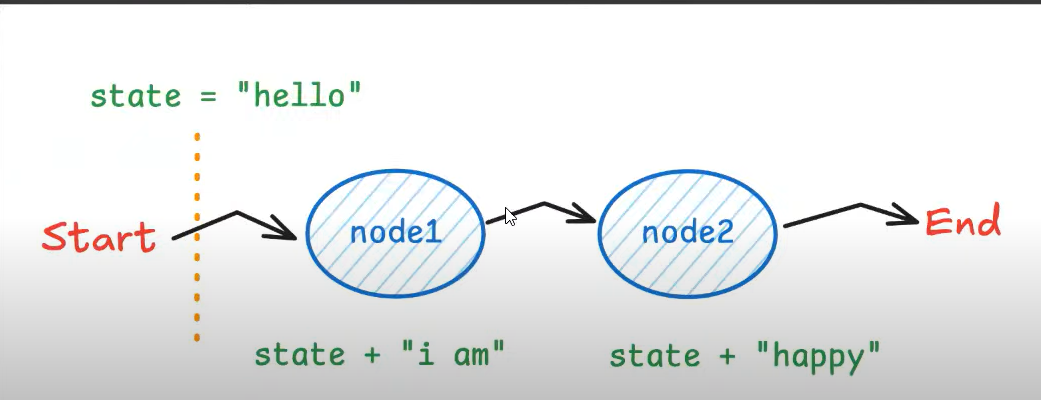

In [1]:
%%capture --no-stderr
%pip install --quiet -U langgraph

# State

First define the State of the graph

The state schema serves as the input schema for all nodes and edges in the graph.

Let's use the TypeDict class from the python's typing modeule as our schema, which provides type hints for the keys.

In [2]:
from typing_extensions import TypedDict

class LearningState(TypedDict):
  prompt: str

In [3]:
# prompt : create an example from above learningState

lahore_state: LearningState = LearningState(prompt="hello from UMT Lahore")

In [4]:
print(lahore_state)
print(lahore_state['prompt'] + " I am")

{'prompt': 'hello from UMT Lahore'}
hello from UMT Lahore I am


# Nodes are just python function

In [5]:
def node_1(state) -> str:
  print("--- Node 1 State ---",  state)
  return state + " I am"

def node_2(state) -> str:
  print("--- Node 2 State ---",  state)
  return state + " happy"

- edges connect nodes


## Build graph

In [6]:
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END
from langgraph.graph.state import CompiledStateGraph

# Build graph

builder: StateGraph = StateGraph(str)

In [7]:
# Nodes

builder.add_node("node_1",node_1)
builder.add_node("node_2",node_2)

In [8]:
# simples to connect Nodes and eges logic

# Define edges between nodes
# This specifies the flow of execution in the graph
builder.add_edge(START, "node_1")
builder.add_edge("node_1", "node_2")
builder.add_edge("node_2", END)

In [9]:
graph: CompiledStateGraph = builder.compile()

In [10]:
print(graph)

In [11]:
graph.get_graph()

Graph(nodes={'__start__': Node(id='__start__', name='__start__', data=RunnablePassthrough(), metadata=None), 'node_1': Node(id='node_1', name='node_1', data=node_1(tags=None, recurse=True, explode_args=False, func_accepts_config=False, func_accepts={}), metadata=None), 'node_2': Node(id='node_2', name='node_2', data=node_2(tags=None, recurse=True, explode_args=False, func_accepts_config=False, func_accepts={}), metadata=None), '__end__': Node(id='__end__', name='__end__', data=None, metadata=None)}, edges=[Edge(source='__start__', target='node_1', data=None, conditional=False), Edge(source='node_1', target='node_2', data=None, conditional=False), Edge(source='node_2', target='__end__', data=None, conditional=False)])

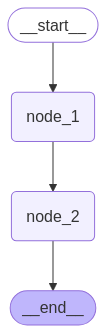

In [ ]:
display(Image(graph.get_graph().draw_mermaid_png()))

In [12]:
graph.invoke("hi")

--- Node 1 State --- hi
--- Node 2 State --- hi I am


'hi I am happy'

In [13]:
%pip install -q -U langchain
%pip install -q -U langchain-google-genai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 21.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-generativeai 0.8.5 requires google-ai-generativelanguage==0.6.15, but you have google-ai-generativelanguage 0.6.18 which is incompatible.


In [14]:
from google.colab import userdata
google_api_key = userdata.get('GEMINI_API_KEY')

In [15]:
from langchain_google_genai import ChatGoogleGenerativeAI

llm: ChatGoogleGenerativeAI = ChatGoogleGenerativeAI(
    model = "gemini-1.5-flash",
    api_key = google_api_key,
)


In [16]:
from langchain_core.messages.ai import AIMessage

ai_msg: AIMessage = llm.invoke("hi")

In [17]:
print(ai_msg.content)
print(type(ai_msg.content))

Hi there! How can I help you today?
<class 'str'>


In [18]:
from typing_extensions import TypedDict
class FirstLLMagentCall(TypedDict):
  prompt: str
  output: str

In [19]:
def node_1(state: FirstLLMagentCall):
  print("--- Node 1 State ---",  state)
  prompt = state["prompt"]
  ai_msg: AIMessage = llm.invoke(prompt)
  return {"output":ai_msg.content}

In [20]:
hanzla_msg = node_1(FirstLLMagentCall(prompt="hello from gcuf"))
print(hanzla_msg)

--- Node 1 State --- {'prompt': 'hello from gcuf'}
{'output': 'Hello from the internet!  Is there anything I can help you with today regarding GC University Faisalabad (GCUF)?'}


In [22]:
from IPython.display import Image, display # preview Graph

from langgraph.graph import StateGraph, START, END
from langgraph.graph.state import CompiledStateGraph # type

# Build graph

builder: StateGraph = StateGraph(state_schema = FirstLLMagentCall)

# Define Nodes

builder.add_node("node_1",node_1)

# we will tell the langgraph how to act

#Add Edges

builder.add_edge(START,"node_1")
builder.add_edge("node_1",END)

# compile Graph

graph: CompiledStateGraph = builder.compile()


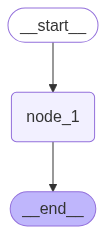

In [23]:
# view how it is working

display(Image(graph.get_graph().draw_mermaid_png()))

In [24]:
# result of the above graph

result = graph.invoke({"prompt":"motivate me to learn Lnaggraph"})

--- Node 1 State --- {'prompt': 'motivate me to learn Lnaggraph'}


In [25]:
print(result)

{'prompt': 'motivate me to learn Lnaggraph', 'output': "Let's talk about why learning LangChain is a worthwhile investment of your time and energy.  Forget abstract benefits; let's get concrete:\n\n**Imagine this:**\n\n* **You're building a chatbot that actually understands context.**  No more frustrating repetitive questions. LangChain allows you to seamlessly connect your chatbot to external knowledge bases, so it can access and process information beyond its initial training.  Think of it answering questions about your company's internal documents, or pulling relevant information from a vast research paper database.\n\n* **You're creating a powerful summarization tool.**  Instead of manually wading through dozens of articles, LangChain empowers you to efficiently summarize key information from multiple sources, delivering concise and insightful reports.  Imagine its application in market research, legal analysis, or academic research.\n\n* **You're developing an innovative applicati

In [27]:
# just another helper function to make the output clear

import textwrap
from IPython.display import display, Markdown
# just another helper function to make the output clear

import textwrap
from IPython.display import display, Markdown
def to_markdown(text: str)-> Markdown:
  text = text.replace(".","*")
  return Markdown(textwrap.indent(text,"> ", predicate = lambda _:True))

In [28]:
print("PROMPT: ", result["prompt"])
to_markdown(result['output'])

PROMPT:  motivate me to learn Lnaggraph


> Let's talk about why learning LangChain is a worthwhile investment of your time and energy*  Forget abstract benefits; let's get concrete:
> 
> **Imagine this:**
> 
> * **You're building a chatbot that actually understands context***  No more frustrating repetitive questions* LangChain allows you to seamlessly connect your chatbot to external knowledge bases, so it can access and process information beyond its initial training*  Think of it answering questions about your company's internal documents, or pulling relevant information from a vast research paper database*
> 
> * **You're creating a powerful summarization tool***  Instead of manually wading through dozens of articles, LangChain empowers you to efficiently summarize key information from multiple sources, delivering concise and insightful reports*  Imagine its application in market research, legal analysis, or academic research*
> 
> * **You're developing an innovative application that integrates multiple APIs*** LangChain acts as the glue, connecting disparate services and streamlining the workflow*  This could be anything from a travel planning assistant pulling information from flight and hotel APIs, to a financial analysis tool integrating data from multiple stock market APIs*
> 
> * **You're at the forefront of a rapidly evolving field***  Large language models (LLMs) are transforming the tech landscape*  LangChain provides a powerful framework to harness their potential, giving you a significant edge in this exciting space*  Mastering it positions you as a sought-after developer*
> 
> * **You're solving real-world problems***  LangChain isn't just theoretical; it's being used to build practical, impactful applications across various industries*  By learning LangChain, you're equipping yourself with the tools to contribute to these advancements*
> 
> **Here's the bottom line:** LangChain isn't just another library; it's a key to unlocking the power of LLMs for real-world applications* It simplifies complex tasks, accelerates development, and opens doors to exciting career opportunities*  The investment in learning it will pay dividends in your skills, projects, and future prospects*  So, are you ready to start building the future?